In [1]:
#load dependencies
import os
import csv
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
#read state unemployment csv ('state_unemployment.csv')
unemploy_df = pd.read_csv("Resources/state_unemployment.csv")
pop_df = pd.read_csv('Clean_Data_Output/Population_Data.csv')

In [3]:
pop_df = pop_df[["State", "Population (2019)", "Total Murders (2019)"]]

In [4]:
#set variable 'bottom_five' to 5 lowest state unemployment rates
bottom_five = unemploy_df.sort_values("unemployment_rate").head(5)
#display 'bottom_five'
bottom_five

,states,unemployment_rate
45,Vermont,2.3
44,Utah,2.3
40,South Carolina,2.3
34,North Dakota,2.4
5,Colorado,2.5


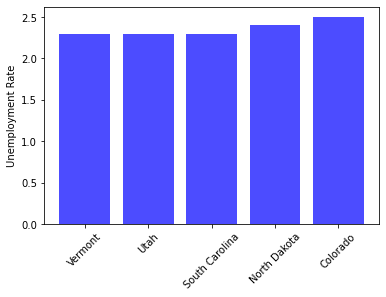

In [5]:
#plot 5 lowest state unemployment rates as histogram
U_rate = bottom_five["unemployment_rate"]
x_axis = bottom_five["states"]
plt.bar(x_axis, U_rate, color='b', alpha=0.70, align="center")
plt.xticks(rotation = 45)
plt.ylabel('Unemployment Rate')
plt.show()

In [6]:
#set variable 'top_five' to 5 highest state unemployment rates
top_five = unemploy_df.sort_values("unemployment_rate",ascending=False).head(5)
#display 'top_five'
top_five

,states,unemployment_rate
1,Alaska,6.0
24,Mississippi,5.7
8,District of Columbia,5.3
48,West Virginia,5.0
18,Louisiana,4.9


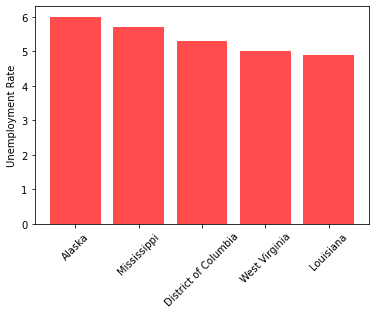

In [7]:
#plot 5 highest state unemployment rates as histogram
U_rate = top_five["unemployment_rate"]
x_axis = top_five["states"]
plt.bar(x_axis, U_rate, color='r', alpha=0.70, align="center")
plt.xticks(rotation = 45)
plt.ylabel('Unemployment Rate')
plt.show()

In [8]:
#create data frame of state unemployment rate and total homicides by state ('unemploy_homicide_df')
unemploy_homicide_df = unemploy_df
unemploy_homicide_df['Total Murders (2019)'] = pop_df['Total Murders (2019)']
unemploy_homicide_df.head()

,states,unemployment_rate,Total Murders (2019)
0,Alabama,2.7,4.0
1,Alaska,6.0,69.0
2,Arizona,4.6,337.0
3,Arkansas,3.6,231.0
4,California,3.9,1679.0


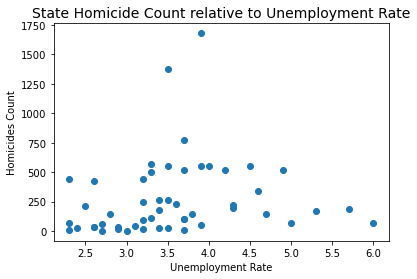

In [30]:
#plot state unemploymnet rate in relaiton to total state homicides as scatterplot
plt.scatter(unemploy_homicide_df["unemployment_rate"], unemploy_homicide_df["Total Murders (2019)"])
plt.title('State Homicide Count relative to Unemployment Rate',fontsize =14)
plt.xlabel('Unemployment Rate',fontsize =10)
plt.ylabel('Homicides Count',fontsize =10)
plt.savefig("Image Output/Unemployment.png")

The r-squared is: 0.023421047777448953


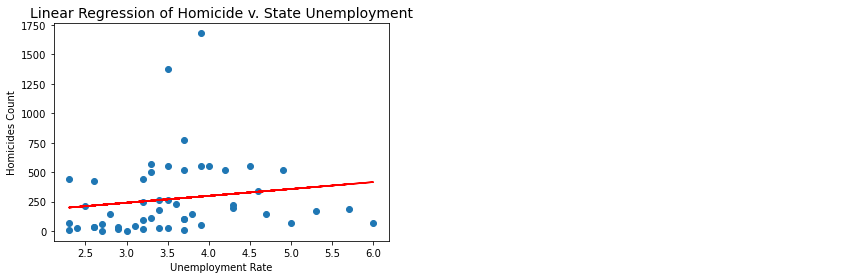

In [29]:
 # Add the linear regression equation and line to plot
x_values = unemploy_homicide_df['unemployment_rate']
y_values = unemploy_homicide_df['Total Murders (2019)']

#set linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#displaying linear regression of Homicide Count & State Unemplyment
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title('Linear Regression of Homicide v. State Unemployment',fontsize =14)
plt.xlabel('Unemployment Rate',fontsize =10)
plt.ylabel('Homicides Count',fontsize =10)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Image Output/Unemployment_Regression.png")
plt.show()